**Source**

1. https://towardsdatascience.com/will-habermans-survival-data-set-make-you-diagnose-cancer-8f40b3449673
2. https://towardsdatascience.com/exploratory-data-analysis-habermans-cancer-survival-dataset-c511255d62cb
3. https://www.kaggle.com/premvardhan/exploratory-data-analysis-haberman-s-survival

I just cross checked by observations as the code is same for the iris and haberman's plotting. 

I added few observation points from the above source links. 

# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



### **Haberman Data Set Observations**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")
haberman.head()



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1



**There are 4 features including class label/dependent variable.**
1.   age - It represents age of patient at the time of operation(numerical)
2.   year - It represents year of operation(numerical)
3.   It tells no of +ve auxillry node detected(numerical)
4.   Survival status 1 = the patient survived 5 years or longer 2 = the patient died within 5 year





In [4]:
# (Q) how many data-points and features?
print (haberman.shape)

(306, 4)


**Observations**

The CSV file contains 306 rows and 4 columns.

In [5]:
#printing the columns
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [6]:
#dataset information
print(haberman.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


**Observations**

1. There are no missing values in this data set.
2. All the columns are of the integer data type.
3. The datatype of the status is an integer, it has to be     converted to a categorical datatype
4. In the status column, the value 1 can be mapped to ‘yes’ which means the patient has survived 5 years or longer. And the value 2 can be mapped to ‘no’ which means the patient died within 5 years.

In [7]:
#mapping the values of 1 and 2 to yes and no respectively and #printing the first 5 records from the dataset.
haberman['status'] = haberman['status'].map({1:'Yes', 2:'No'})
haberman.head() 

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [8]:
#describes the dataset
haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


**Observations**

1. Count : Total number of values present in respective columns.
2. Mean: Mean of all the values present in the respective columns.
3. Std: Standard Deviation of the values present in the respective columns.
4. Min: The minimum value in the column.
5. 25%: Gives the 25th percentile value.
6. 50%: Gives the 50th percentile value.
7. 75%: Gives the 75th percentile value.
8. Max: The maximum value in the column.

In [9]:
#gives each count of the status type
haberman['status'].value_counts()

Yes    225
No      81
Name: status, dtype: int64

**Observations**

1. The value_counts() function tells how many data points for each class are present. Here, it tells how many patients survived and how many did not survive.
2. Out of 306 patients, 225 patients survived and 81 did not.
3. The dataset is imbalanced.

In [10]:
#status_yes dataframe stores all the records where status is yes
status_yes = haberman[haberman['status']=='Yes']
status_yes.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [11]:
#status_no dataframe stores all the records where status is no
status_no = haberman[haberman['status']=='No']
status_no.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


**Observations**

1. The mean age and the year in which the patients got operated are almost similar of both the classes, while the mean of the nodes of both the classes differs by 5 units approximately.
2. The nodes of patients who survived are less when compared to patients who did not survive.

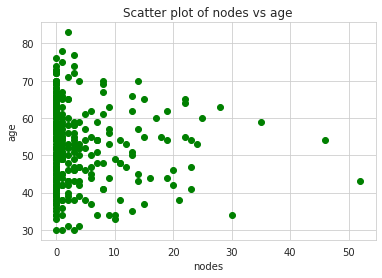

In [34]:
plt.scatter(haberman['nodes'],haberman['age'],color='green')
plt.title('Scatter plot of nodes vs age')
plt.xlabel('nodes')
plt.ylabel('age')
plt.show()
#These above snippet will given me the scatter plot w.r.t the Nodes on x-axis and Age on y-axis.
## Here I used matplotlib library to plot 

**Observations**

Above scatter plot shows all data in overlap fashion and also in same colour due to which we are unable to distinguish between data and also there are possibilities that you may miss some of my data which may lead to wrong conclusion. So, to distinguish between the data we can use seaborn packages function which simply to distinguish data visually by allocating different colours to every classification feature.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


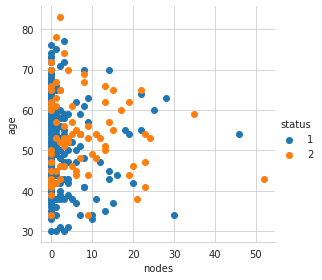

Text(0.5, 0.98, 'Scatter plot of nodes vs age')

In [53]:
sns.set_style('whitegrid')
plot = sns.FacetGrid(haberman, hue='status', size=4)
plot.map(plt.scatter,'nodes', 'age').add_legend();
plt.show();
plot.fig.suptitle('Scatter plot of nodes vs age') 

**Observation:**
1. Patients with 0 nodes are more likely to survive irrespective of their age.
2. There are hardly any patients who have nodes more than 25.
3. Patients aged more than 50 with nodes more than 10 are less likely to survive.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


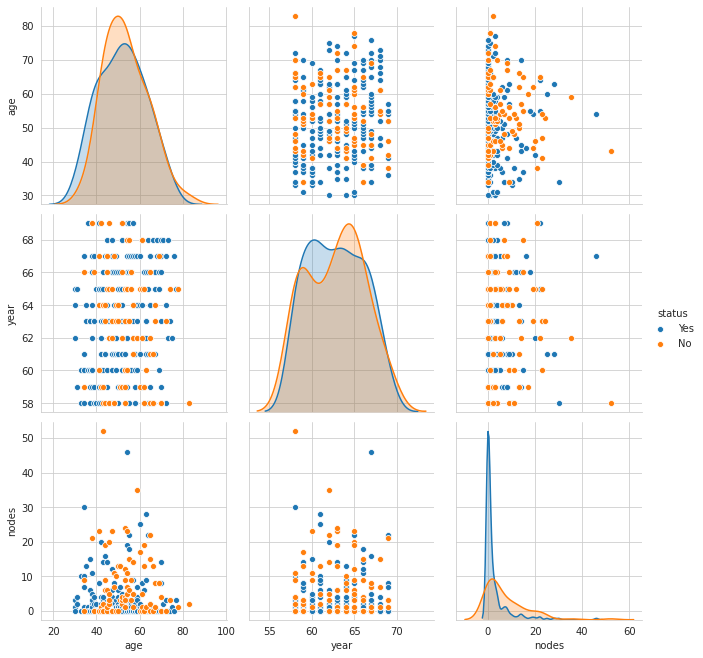

In [14]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(haberman, hue='status', size=3, vars=['age','year','nodes'])
plt.show()

Above image is the combinations plot of all features in data. These types of plot is know as pairplots. 

Plot 1,Plot 5 and Plot 9 are the histograms of all combinations of features which explain you the density of data by considering different features of data.

Here lower triage is mirror if upper triangle. So, we will look into upper triangle plots and let's take few observations. 

Upper Triangle plots are P2,P3 and p6 

**Plot 2**

In this plot you can see that there is year when the operation took place on X-axis and Age the person on Y-axis and the plot of there data is mostly overlapping on each other data so we cannot distinguish if there is any orange point present below blue point or vice versa.So I am rejecting these 2 data feature combination for further analysis.

**Plot 3**

In this plot there are some points which is distinguishable but still it is better from other plot as we can provide conclusion more precisely by histogram and CDF.
In this plot the overlap of points are there but still it is better than all other plots comparatively. So I will select the data feature of this plot ie. Age and Axillary nodes.

**Plot 6**

It plot on the feature Operation Age and Axillary nodes which is somewhat similar to the Plot 2 but overlapping of points seems to be more in this plot comparative to other. So, I will also reject this combination

Here, I consider the feature age and nodes plotting in the Plot 3 and 7 for my all further data operations

### **Univariate Analysis(pdf, cdf, boxplot and violin plot)**

Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, "variate" means "variable or numeric variable" so, in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

In [15]:
#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")
haberman.head(1)

,age,year,nodes,status
0,30,64,1,1


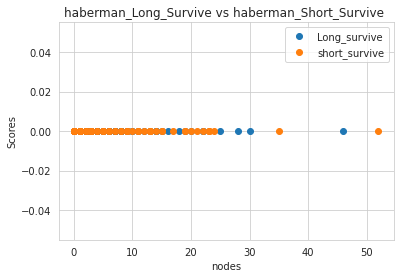

In [23]:
import numpy as np
fig, ax = plt.subplots()
haberman_Long_Survive = haberman.loc[haberman['status'] == 1];
haberman_Short_Survive = haberman.loc[haberman['status'] == 2];
Long = ax.plot(haberman_Long_Survive['nodes'], np.zeros_like(haberman_Long_Survive['nodes']), 'o',label='Long_survive')
short = ax.plot(haberman_Short_Survive['nodes'], np.zeros_like(haberman_Short_Survive['nodes']), 'o',label='short_survive')
plt.ylabel('Scores')
plt.title('haberman_Long_Survive vs haberman_Short_Survive ')
plt.xlabel('nodes')
ax.legend()
plt.show()


Here you can observe the data of short survival status are mostly overlap on long survival status due to which you will not able to conclude on this data.
You can get better clarification if you use PDF or CDF of data for plotting.

**PDF (Probability Density Function)**
It shows the density of that data or number of data present on that point. PDF will be a peak like structure represents high peak if more number of data present or else it will be flat/ small peak if number of data present is less.It is smooth graph plot using the edges of histogram

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


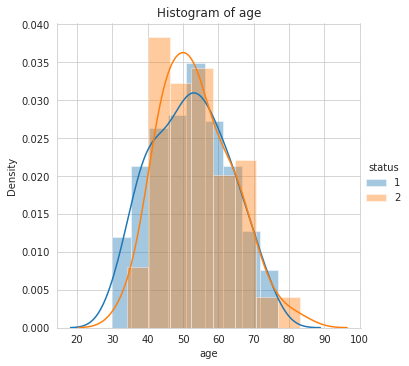

In [25]:
sns.FacetGrid(haberman, hue = "status", size = 5).map(sns.distplot, "age").add_legend()
plt.title("Histogram of age")
plt.ylabel("Density")
plt.show()

**Observations:**
1. Major overlapping is observed, which tells us that survival chances are irrespective of a person’s age.
2. Although there is overlapping we can vaguely tell that people whose age is in the range 30–40 are more likely to survive, and 40–60 are less likely to survive. While people whose age is in the range 60–75 have equal chances of surviving and not surviving.
3. Yet, this cannot be our final conclusion. We cannot decide the survival chances of a patient just by considering the age parameter

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


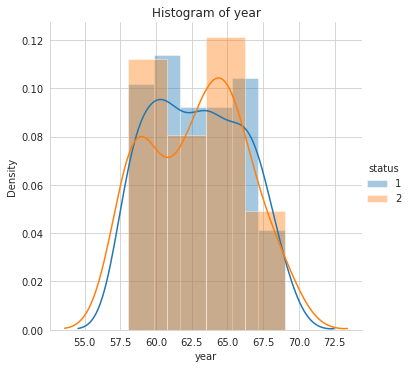

In [26]:
sns.FacetGrid(haberman, hue = "status", size = 5).map(sns.distplot, "year").add_legend()
plt.title("Histogram of year")
plt.ylabel("Density")
plt.show()
##PDF of Operation Age

**Observations:**
There is major overlapping observed. This graph only tells how many of the operations were successful and how many weren’t. This cannot be a parameter to decide the patient’s survival chances.
However, it can be observed that in the years 1960 and 1965 there were more unsuccessful operations.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


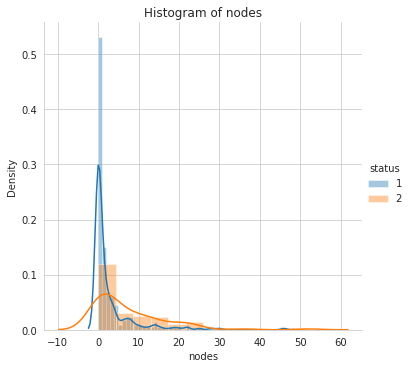

In [27]:
sns.FacetGrid(haberman, hue = "status", size = 5).map(sns.distplot, "nodes").add_legend()
plt.title("Histogram of nodes")
plt.ylabel("Density")
plt.show()
##PDF of Operation Age
##PDF of Axillary Nodes

**Observations:**
Patients with no nodes or 1 node are more likely to survive. There are very few chances of surviving if there are 25 or more nodes.

if(AxillaryNodes≤0)
Patient= Long survival
else if(AxillaryNodes≥0 && Axillary nodes≤3.5(approx))
Patient= Long survival chances are high
else if(Axillary nodes ≥3.5)
Patient = Short survival

## **Cumulative Distribution Function(CDF)**
The Cumulative Distribution Function (CDF) is the probability that the variable takes a value less than or equal to x.

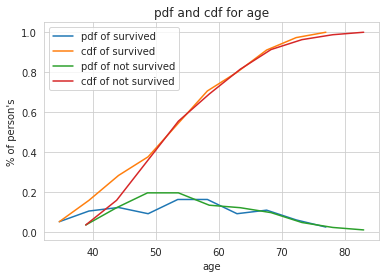

In [54]:
# cdf gives you cummulative probability associated with a function
# Cumulative sum of area under curve upto gives you cdf
survived = haberman.loc[haberman["status"] == 1]
not_survived = haberman.loc[haberman["status"] == 2]
label = ["pdf of survived", "cdf of survived", "pdf of not survived", "cdf of not survived"]
counts, bin_edges = np.histogram(survived["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for age")
plt.xlabel("age")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(not_survived["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

**Observation**

1. Orange line shows there is a 85% chance of long survival if number of axillary nodes detected are < 5. Also you can see as number of axillary nodes increases survival chances also reduces means it is clearly observed that 80% — 85% of people have good chances of survival if they have less no of auxillary nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes increases >40

2. You can observe in above combine CDF for Long survival observation is same but in Short survival nearly 55% of people who have nodes less than 5 and there are nearly 100% of people in short survival if nodes are > 40

3. 83.55% of the patients who have survived had nodes in the range of 0–4.6

### **Box Plots and Violin Plots**

The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. Outlier points are those past the end of the whiskers.

Violin plot is the combination of a box plot and probability density function(CDF).

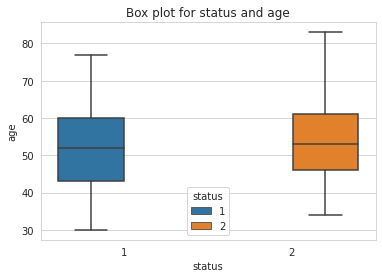

In [0]:
sns.boxplot(x = "status", y = "age", hue = "status", data = haberman).set_title("Box plot for status and age")
plt.show()

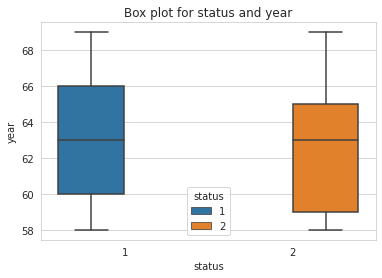

In [0]:
sns.boxplot(x = "status", y = "year", hue = "status", data = haberman).set_title("Box plot for status and year")
plt.show()

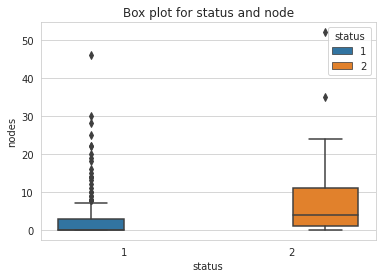

In [0]:
sns.boxplot(x = "status", y = "nodes", hue = "status", data = haberman).set_title("Box plot for status and node")
plt.show()

**Observation**

From the above box whiskers 25th percentile and 50th percentile are nearly same for Long survive and threshold for it is 0 to 7. Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival us 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2
So,if nodes between 0–7 have chances of error as short survival plot is also lies in it. That is 50% error for Short survival status
There are most of point above 12 lies in Short survival

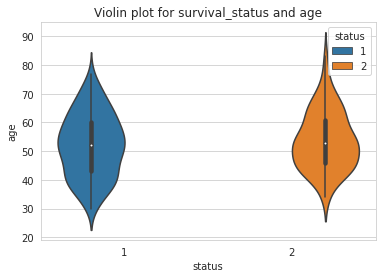

In [0]:
# The violin plot shows the full distribution of the data.
# It is combination of box plot and histogram
# central dot represents median

sns.violinplot(x = "status", y = "age", hue = "status", data = haberman)
plt.title("Violin plot for survival_status and age")
plt.show()

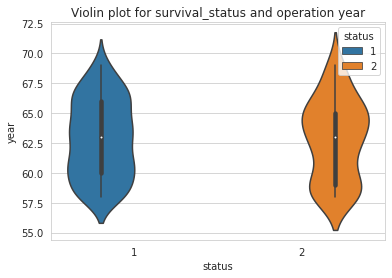

In [0]:
sns.violinplot(x = "status", y = "year", hue = "status", data = haberman)
plt.title("Violin plot for survival_status and operation year")
plt.show()

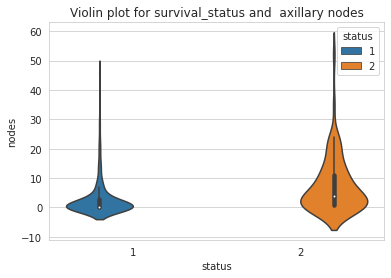

In [0]:
sns.violinplot(x = "status", y = "nodes", hue = "status", data = haberman)
plt.title("Violin plot for survival_status and  axillary nodes")
plt.show()

**Observation**

In above violin plot we observe that For long survive density for it is more near the 0 nodes and also it has whiskers in range o-7 and in violin 2 it shows the short survival density more from 0–20 ans threshold from 0–12

# **Observations:**
1. Patients with more than 1 nodes are not likely to survive. More the number of nodes, lesser the survival chances.
2. A large percentage of patients who survived had 0 nodes. Yet there is a small percentage of patients who had no positive axillary nodes died within 5 years of operation, thus an absence of positive axillary nodes cannot always guarantee survival.
3. There were comparatively more people who got operated in the year 1965 did not survive for more than 5 years.
4. There were comparatively more people in the age group 45 to 65 who did not survive. Patient age alone is not an important parameter in determining the survival of a patient.
5. The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points. The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and thus it is difficult to set a threshold to classify both classes of patients.

### **Contour Plot**

Contour plots are like density plot means if the number of data is more on specific point that area will get darker and if you visualise it will make hill like structure where hill top has maximum density of point and density decreases as hill slope getting decreases.

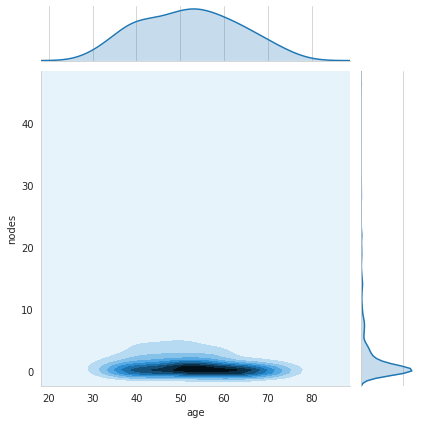

In [0]:
sns.jointplot(x='age',y='nodes',data=haberman_Long_Survive,kind='kde')
plt.grid()
plt.show()

Above is the 2D density plot for long survival using feature age and axillary nodes, it is observed the density of point for long survival is more from age range 47–60 and axillary nodes from 0–3. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot.

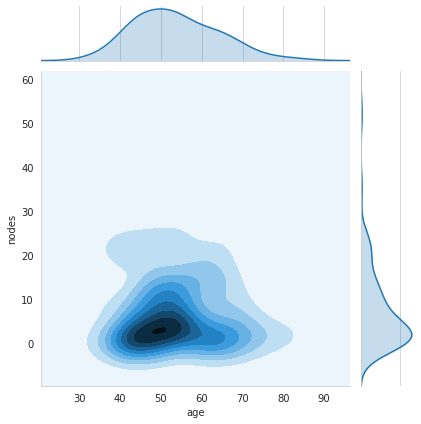

In [0]:
sns.jointplot(x='age',y='nodes',data=haberman_Short_Survive,kind='kde')
plt.grid()
plt.show()

Above is the 2D density plot for short survival using feature age and axillary nodes, it is observed the density of point for long survival is more from age range 42/43–53 and axillary nodes from 0–5/6. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot.

## **Final Observations:**
1. The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
2. The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.
3. somehow axillary_lymph_node is giving some intution in the dataset.
4. we can not build simple model using only if else condition we need to have some more complex technique to handle this dataset.
5. Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival.
6. The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced.
2. Patients with less than 35 years of will survive 5 years or longer
2. Patients with more than 75 years of will not survive 5 years or longer.
3. Patients having less than 5 positive auxillary nodes have slightly high rate of survival.
4. Eventhough we can reach at above conclutions we are unable to find out a perfect relation as the dataset is imbalenced.